In [26]:
import xarray as xr
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping

shapefile_path = 'BrasilShape/BR_UF_2022.shp'
gdf = gpd.read_file(shapefile_path)
es_gdf = gdf[gdf['SIGLA_UF'] == 'ES']

In [27]:
gdf

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.2483 -13.19239, -48.24844 -13.19..."
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.5868 -2.23341, -44.58696 -..."
6,22,Piauí,PI,Nordeste\n,251755.481,"POLYGON ((-42.47034 -3.48377, -42.46126 -3.484..."
7,23,Ceará,CE,Nordeste\n,148894.447,"POLYGON ((-37.87162 -4.3664, -37.87109 -4.3670..."
8,24,Rio Grande do Norte,RN,Nordeste\n,52809.599,"MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ..."
9,25,Paraíba,PB,Nordeste\n,56467.242,"MULTIPOLYGON (((-34.7958 -7.175, -34.79578 -7...."


In [28]:
# Carregar o dataset
def getTemp(modelo: str, type: str):
    btw2006_2040 = xr.open_dataset(f"src/Eta-HadGEM_5km_mensal/{modelo}/2006-2040/{type}/Eta_HadGEM2-ES_cor_5km_{modelo}_Mensal_{type}_2006_2040.nc")
    btw2041_2070 = xr.open_dataset(f"src/Eta-HadGEM_5km_mensal/{modelo}/2041-2070/{type}/Eta_HadGEM2-ES_cor_5km_{modelo}_Mensal_{type}_2041_2070.nc")
    btw2071_2099 = xr.open_dataset(f"src/Eta-HadGEM_5km_mensal/{modelo}/2071-2099/{type}/Eta_HadGEM2-ES_cor_5km_{modelo}_Mensal_{type}_2071_2099.nc")

    typeData = type.lower()
    temp_2006_2040 = btw2006_2040[typeData]
    temp_2041_2070 = btw2041_2070[typeData]
    temp_2071_2099 = btw2071_2099[typeData]
    
    temp_2006_2040['Periodo'] = '2006-2040'
    temp_2041_2070['Periodo'] = '2041-2070'
    temp_2071_2099['Periodo'] = '2071-2099'
    
    temp = xr.concat([temp_2006_2040, temp_2041_2070, temp_2071_2099], dim='time')
    
    temp['Mês'] = temp['time'].dt.month  # Extract Mês from time coordinate
    temp['Ano'] = temp['time'].dt.year  # Extract Mês from time coordinate
    return temp

def getHistorical(type: str): 
    historical = xr.open_dataset(f'src/Eta-HadGEM_5km_mensal/Historical/1976-2005/{type}/Eta_HadGEM2-ES_5km_Historical_Mensal_{type}.nc')
    typeData = type.lower()
    temp_hist = historical[typeData]
    temp_hist['Periodo'] = '1976-2005'
    
    temp_hist['Mês'] = temp_hist['time'].dt.month  # Extract Mês from time coordinate
    temp_hist['Ano'] = temp_hist['time'].dt.year  # Extract Mês from time coordinate
    return temp_hist
    return historical

In [29]:
historical = getHistorical('tp2m')
rcp45 = getTemp('RCP4.5', 'tp2m')
rcp85 = getTemp('RCP8.5', 'tp2m')

In [30]:
# Convert the GeoDataFrame to a GeoSeries
espirito_santo_geometry = es_gdf.geometry

# Reproject the NetCDF data to match the coordinate system of the shapefile
temperature_data = rcp45.rio.write_crs('epsg:4326')

# Clip the data
temperature_clipped = temperature_data.rio.clip(espirito_santo_geometry.apply(mapping), es_gdf.crs)


In [31]:
# Assuming the data is already averaged over the region of interest
# If not, you can use spatial averaging methods (e.g., mean over lat/lon)

# For this example, let's assume the data is already averaged
temperature_rcp45_timeseries = rcp45.mean(dim=['lat', 'lon'])
temperature_rcp85_timeseries = rcp85.mean(dim=['lat', 'lon'])
temperature_historical_timeseries = historical.mean(dim=['lat', 'lon'])


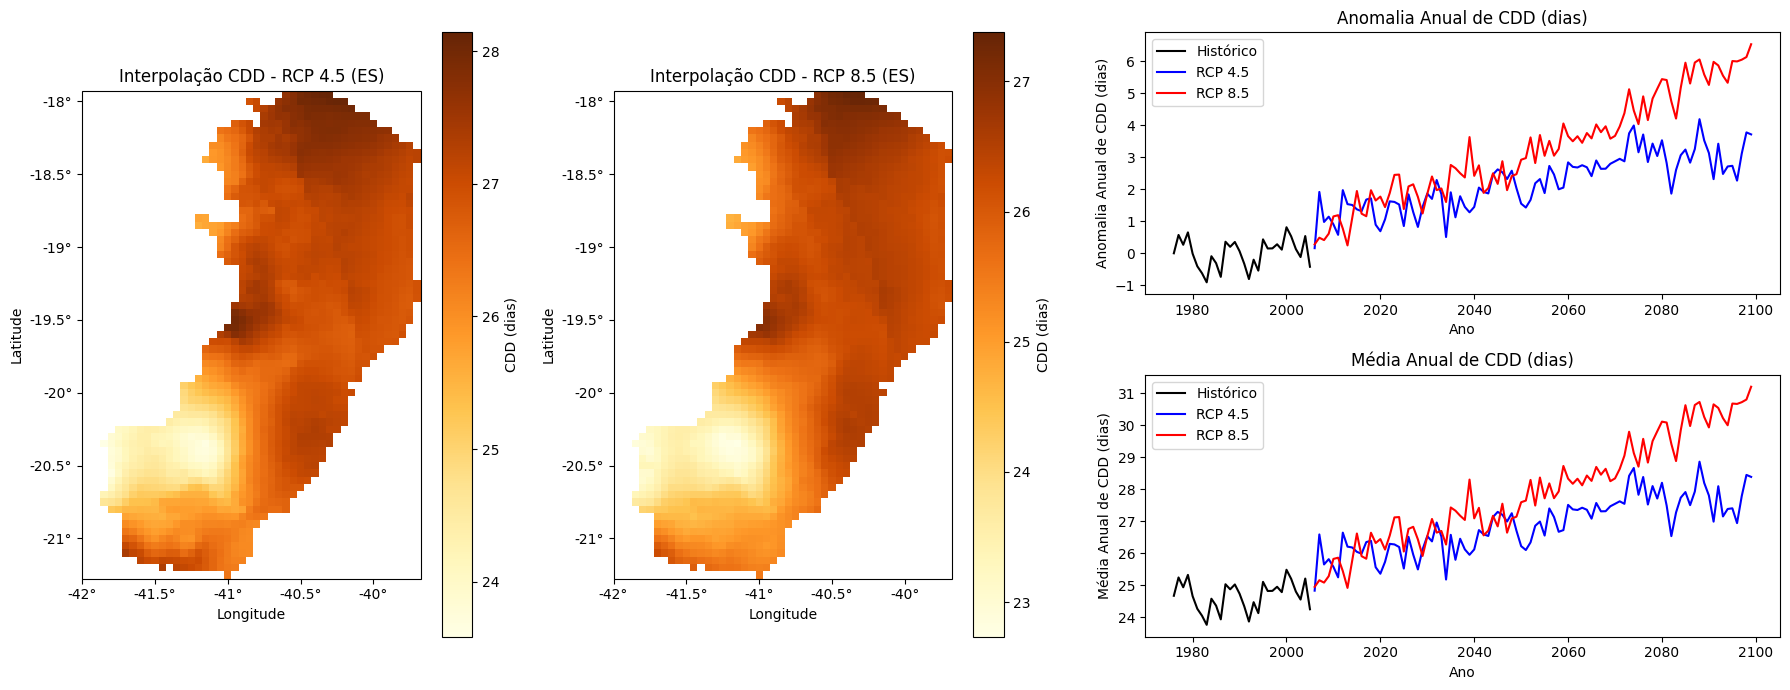

In [33]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
from shapely.geometry import mapping

def clip_to_es(data, es_gdf):
    temp_data = data.rio.write_crs('epsg:4326')
    return temp_data.rio.clip(es_gdf.geometry.apply(mapping), es_gdf.crs)

# Clip the data to the Espírito Santo shapefile
historical_es = clip_to_es(historical, es_gdf)
rcp45_es = clip_to_es(rcp45, es_gdf)
rcp85_es = clip_to_es(rcp85, es_gdf)

# Plot the data
fig = plt.figure(figsize=(18, 7))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1.5], height_ratios=[1, 1])

ax1 = plt.subplot(gs[0:2, 0], projection=ccrs.PlateCarree())
ax2 = plt.subplot(gs[0:2, 1], projection=ccrs.PlateCarree())
ax3 = plt.subplot(gs[0, 2])
ax4 = plt.subplot(gs[1, 2])

# Utility function to plot the data
def plot_data(data, ax, title):
    try:
        data.isel(time=0).plot.pcolormesh(
            ax=ax, cmap='YlOrBr', transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'CDD (dias)'}
        )
        ax.set_title(title)
        ax.set_xticks([-42, -41.5, -41, -40.5, -40], crs=ccrs.PlateCarree())
        ax.set_yticks([-21, -20.5, -20, -19.5, -19, -18.5, -18], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(plt.FixedFormatter(['-42°', '-41.5°', '-41°', '-40.5°', '-40°']))
        ax.yaxis.set_major_formatter(plt.FixedFormatter(['-21°', '-20.5°', '-20°', '-19.5°', '-19°', '-18.5°', '-18°']))
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
    except ValueError as e:
        print(f"ValueError while plotting {title}: {e}")
        ax.set_title(f"Error in {title}")

# Plot Historical data
# plot_data(historical_es, ax1, 'Interpolação CDD - Histórico (ES)')

# Plot RCP 4.5 data
plot_data(rcp45_es, ax1, 'Interpolação CDD - RCP 4.5 (ES)')

# Plot RCP 8.5 data
plot_data(rcp85_es, ax2, 'Interpolação CDD - RCP 8.5 (ES)')


# Calcular a média espacial (sobre as dimensões de latitude e longitude)
temperature_historical_spatial_mean = historical_es.mean(dim=['lat', 'lon'])
temperature_rcp45_spatial_mean = rcp45_es.mean(dim=['lat', 'lon'])
temperature_rcp85_spatial_mean = rcp85_es.mean(dim=['lat', 'lon'])

# Calcular a média anual das séries temporais
temperature_historical_annual_mean = temperature_historical_spatial_mean.groupby('time.year').mean(dim='time')
temperature_rcp45_annual_mean = temperature_rcp45_spatial_mean.groupby('time.year').mean(dim='time')
temperature_rcp85_annual_mean = temperature_rcp85_spatial_mean.groupby('time.year').mean(dim='time')

# Calcular a média climatológica anual (por exemplo, para o período histórico 1976-2005)
historical_period = historical_es.sel(time=slice('1976', '2005'))
historical_climatology = historical_period.mean(dim=['time', 'lat', 'lon'])

# Calcular as anomalias anuais
temperature_historical_annual_anomaly = temperature_historical_annual_mean - historical_climatology
temperature_rcp45_annual_anomaly = temperature_rcp45_annual_mean - historical_climatology
temperature_rcp85_annual_anomaly = temperature_rcp85_annual_mean - historical_climatology


# Médias anuais
ax4.plot(temperature_historical_annual_mean['year'], temperature_historical_annual_mean, label='Histórico', color='black')
ax4.plot(temperature_rcp45_annual_mean['year'], temperature_rcp45_annual_mean, label='RCP 4.5', color='blue')
ax4.plot(temperature_rcp85_annual_mean['year'], temperature_rcp85_annual_mean, label='RCP 8.5', color='red')
ax4.set_title('Média Anual de CDD (dias)')
ax4.set_xlabel('Ano')
ax4.set_ylabel('Média Anual de CDD (dias)')
ax4.legend()

# Anomalias anuais
ax3.plot(temperature_historical_annual_anomaly['year'], temperature_historical_annual_anomaly, label='Histórico', color='black')
ax3.plot(temperature_rcp45_annual_anomaly['year'], temperature_rcp45_annual_anomaly, label='RCP 4.5', color='blue')
ax3.plot(temperature_rcp85_annual_anomaly['year'], temperature_rcp85_annual_anomaly, label='RCP 8.5', color='red')
ax3.set_title('Anomalia Anual de CDD (dias)')
ax3.set_xlabel('Ano')
ax3.set_ylabel('Anomalia Anual de CDD (dias)')
ax3.legend()


plt.tight_layout()
plt.show()